In [1]:
match_id = "2380"

In [1]:
import MatchStats as ms
import pandas as pd

In [3]:
df = ms.get_map_summary_data(match_id)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2380 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2380'}
DEBUG:root:mapbase = {'Match Id': '2380', 'Date': '2018-01-11'}
DEBUG:root:mapbase = {'Match Id': '2380', 'Date': '2018-01-11', 'Team A': 'DAL', 'Team B': 'SEO'}
DEBUG:root:mp={'Match Id': '2380', 'Date': '2018-01-11', 'Team A': 'DAL', 'Team B': 'SEO', 'Map Number': 1, 'Map Name': 'Junkertown', 'Map Type': 'Escort', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2380', 'Date': '2018-01-11', 'Team A': 'DAL', 'Team B': 'SEO', 'Map Number': 2, 'Map Name': 'Temple of Anubis', 'Map Type': 'Assault', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2380', 'Date': '2018-01-11', 'Team A': 'DAL', 'Team B': 'SEO', 'Map Number': 3, 'Map Name': 'Ilios', 'Map Type': 'KOTH', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2380', 'Date': '2018-01-11', 'Team A': 'DAL'

In [4]:
df.head()

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-01-11,Junkertown,1,Escort,2380,DAL,SEO,Team A
1,2018-01-11,Temple of Anubis,2,Assault,2380,DAL,SEO,Team B
2,2018-01-11,Ilios,3,KOTH,2380,DAL,SEO,Team B
3,2018-01-11,Numbani,4,Hybrid,2380,DAL,SEO,Tie


# Get info from all matches

In [2]:
import time
from bs4 import BeautifulSoup
from pprint import pprint
import requests

In [3]:
MATCH_LIST_URL = "https://www.winstonslab.com/events/event.php?id=86#matches"

In [4]:
response = requests.get(MATCH_LIST_URL)
html = BeautifulSoup(response.text, "lxml")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /events/event.php?id=86 HTTP/1.1" 200 None


In [5]:
past_div = html.find("div", {"id": "past"})
table_body = past_div.find("table").find("tbody")
rows = table_body.findAll("tr")

## Going through single matches

In [6]:
df_list = []

In [7]:
for row in rows:
    match_link = row.td.a
    match_id = match_link.attrs["href"].split("=")[-1]
    df_list.append(ms.get_map_summary_data(match_id))

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2449 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2449'}
DEBUG:root:mapbase = {'Match Id': '2449', 'Date': '2018-02-10'}
DEBUG:root:mapbase = {'Match Id': '2449', 'Date': '2018-02-10', 'Team A': 'VAL', 'Team B': 'SHD'}
DEBUG:root:mp={'Match Id': '2449', 'Date': '2018-02-10', 'Team A': 'VAL', 'Team B': 'SHD', 'Map Number': 1, 'Map Name': 'Numbani', 'Map Type': 'Hybrid', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2449', 'Date': '2018-02-10', 'Team A': 'VAL', 'Team B': 'SHD', 'Map Number': 2, 'Map Name': 'Temple of Anubis', 'Map Type': 'Assault', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2449', 'Date': '2018-02-10', 'Team A': 'VAL', 'Team B': 'SHD', 'Map Number': 3, 'Map Name': 'Ilios', 'Map Type': 'KOTH', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2449', 'Date': '2018-02-10', 'Team A': 'VAL', '

DEBUG:root:mapbase = {'Match Id': '2442', 'Date': '2018-02-08', 'Team A': 'SFS', 'Team B': 'GLA'}
DEBUG:root:mp={'Match Id': '2442', 'Date': '2018-02-08', 'Team A': 'SFS', 'Team B': 'GLA', 'Map Number': 1, 'Map Name': 'Numbani', 'Map Type': 'Hybrid', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2442', 'Date': '2018-02-08', 'Team A': 'SFS', 'Team B': 'GLA', 'Map Number': 2, 'Map Name': 'Horizon Lunar Colony', 'Map Type': 'Assault', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2442', 'Date': '2018-02-08', 'Team A': 'SFS', 'Team B': 'GLA', 'Map Number': 3, 'Map Name': 'Oasis', 'Map Type': 'KOTH', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2442', 'Date': '2018-02-08', 'Team A': 'SFS', 'Team B': 'GLA', 'Map Number': 4, 'Map Name': 'Junkertown', 'Map Type': 'Escort', 'Winner': 'Team B'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2441 HTTP/1.1" 200 None
D

DEBUG:root:mp={'Match Id': '2435', 'Date': '2018-02-03', 'Team A': 'SFS', 'Team B': 'FLA', 'Map Number': 2, 'Map Name': 'Temple of Anubis', 'Map Type': 'Assault', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2435', 'Date': '2018-02-03', 'Team A': 'SFS', 'Team B': 'FLA', 'Map Number': 3, 'Map Name': 'Ilios', 'Map Type': 'KOTH', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2435', 'Date': '2018-02-03', 'Team A': 'SFS', 'Team B': 'FLA', 'Map Number': 4, 'Map Name': 'Junkertown', 'Map Type': 'Escort', 'Winner': 'Team A'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2434 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2434'}
DEBUG:root:mapbase = {'Match Id': '2434', 'Date': '2018-02-02'}
DEBUG:root:mapbase = {'Match Id': '2434', 'Date': '2018-02-02', 'Team A': 'LDN', 'Team B': 'SEO'}
DEBUG:root:mp={'Match Id': '2434', 'Date': '2018-02-02', 'Team A': 'LDN'

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2427 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2427'}
DEBUG:root:mapbase = {'Match Id': '2427', 'Date': '2018-01-27'}
DEBUG:root:mapbase = {'Match Id': '2427', 'Date': '2018-01-27', 'Team A': 'VAL', 'Team B': 'FLA'}
DEBUG:root:mp={'Match Id': '2427', 'Date': '2018-01-27', 'Team A': 'VAL', 'Team B': 'FLA', 'Map Number': 1, 'Map Name': 'Eichenwalde', 'Map Type': 'Hybrid', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2427', 'Date': '2018-01-27', 'Team A': 'VAL', 'Team B': 'FLA', 'Map Number': 2, 'Map Name': 'Temple of Anubis', 'Map Type': 'Assault', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2427', 'Date': '2018-01-27', 'Team A': 'VAL', 'Team B': 'FLA', 'Map Number': 3, 'Map Name': 'Ilios', 'Map Type': 'KOTH', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2427', 'Date': '2018-01-27', 'Team A': 'VAL

DEBUG:root:mp={'Match Id': '2421', 'Date': '2018-01-26', 'Team A': 'PHI', 'Team B': 'NYE', 'Map Number': 5, 'Map Name': 'Lijiang Tower', 'Map Type': 'KOTH', 'Winner': 'Team A'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2420 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2420'}
DEBUG:root:mapbase = {'Match Id': '2420', 'Date': '2018-01-25'}
DEBUG:root:mapbase = {'Match Id': '2420', 'Date': '2018-01-25', 'Team A': 'BOS', 'Team B': 'LDN'}
DEBUG:root:mp={'Match Id': '2420', 'Date': '2018-01-25', 'Team A': 'BOS', 'Team B': 'LDN', 'Map Number': 1, 'Map Name': 'Numbani', 'Map Type': 'Hybrid', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2420', 'Date': '2018-01-25', 'Team A': 'BOS', 'Team B': 'LDN', 'Map Number': 2, 'Map Name': 'Temple of Anubis', 'Map Type': 'Assault', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2420', 'Date': '2018-01-25', 'Team A': 

DEBUG:root:mp={'Match Id': '2414', 'Date': '2018-01-20', 'Team A': 'VAL', 'Team B': 'LDN', 'Map Number': 4, 'Map Name': 'Eichenwalde', 'Map Type': 'Hybrid', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2414', 'Date': '2018-01-20', 'Team A': 'VAL', 'Team B': 'LDN', 'Map Number': 5, 'Map Name': 'Lijiang Tower', 'Map Type': 'KOTH', 'Winner': 'Team B'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2413 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2413'}
DEBUG:root:mapbase = {'Match Id': '2413', 'Date': '2018-01-20'}
DEBUG:root:mapbase = {'Match Id': '2413', 'Date': '2018-01-20', 'Team A': 'LDN', 'Team B': 'DAL'}
DEBUG:root:mp={'Match Id': '2413', 'Date': '2018-01-20', 'Team A': 'LDN', 'Team B': 'DAL', 'Map Number': 1, 'Map Name': 'Junkertown', 'Map Type': 'Escort', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2413', 'Date': '2018-01-20', 'Team A': 'LD

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2406 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2406'}
DEBUG:root:mapbase = {'Match Id': '2406', 'Date': '2018-01-18'}
DEBUG:root:mapbase = {'Match Id': '2406', 'Date': '2018-01-18', 'Team A': 'FLA', 'Team B': 'SEO'}
DEBUG:root:mp={'Match Id': '2406', 'Date': '2018-01-18', 'Team A': 'FLA', 'Team B': 'SEO', 'Map Number': 1, 'Map Name': 'Dorado', 'Map Type': 'Escort', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2406', 'Date': '2018-01-18', 'Team A': 'FLA', 'Team B': 'SEO', 'Map Number': 2, 'Map Name': 'Horizon Lunar Colony', 'Map Type': 'Assault', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2406', 'Date': '2018-01-18', 'Team A': 'FLA', 'Team B': 'SEO', 'Map Number': 3, 'Map Name': 'Oasis', 'Map Type': 'KOTH', 'Winner': 'Team B'}
DEBUG:root:mp={'Match Id': '2406', 'Date': '2018-01-18', 'Team A': 'FLA'

DEBUG:root:mp={'Match Id': '2399', 'Date': '2018-01-13', 'Team A': 'VAL', 'Team B': 'DAL', 'Map Number': 2, 'Map Name': 'Horizon Lunar Colony', 'Map Type': 'Assault', 'Winner': 'Tie'}
DEBUG:root:mp={'Match Id': '2399', 'Date': '2018-01-13', 'Team A': 'VAL', 'Team B': 'DAL', 'Map Number': 3, 'Map Name': 'Ilios', 'Map Type': 'KOTH', 'Winner': 'Team A'}
DEBUG:root:mp={'Match Id': '2399', 'Date': '2018-01-13', 'Team A': 'VAL', 'Team B': 'DAL', 'Map Number': 4, 'Map Name': 'Numbani', 'Map Type': 'Hybrid', 'Winner': 'Team A'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.winstonslab.com
DEBUG:urllib3.connectionpool:https://www.winstonslab.com:443 "GET /matches/match.php?id=2383 HTTP/1.1" 200 None
DEBUG:root:mapbase = {'Match Id': '2383'}
DEBUG:root:mapbase = {'Match Id': '2383', 'Date': '2018-01-12'}
DEBUG:root:mapbase = {'Match Id': '2383', 'Date': '2018-01-12', 'Team A': 'BOS', 'Team B': 'NYE'}
DEBUG:root:mp={'Match Id': '2383', 'Date': '2018-01-12', 'Team A': 'BOS', 

In [8]:
full_df = pd.concat(df_list)
full_df.head()

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-02-10,Numbani,1,Hybrid,2449,VAL,SHD,Team A
1,2018-02-10,Temple of Anubis,2,Assault,2449,VAL,SHD,Team A
2,2018-02-10,Ilios,3,KOTH,2449,VAL,SHD,Team A
3,2018-02-10,Junkertown,4,Escort,2449,VAL,SHD,Team A
0,2018-02-10,Eichenwalde,1,Hybrid,2448,SEO,SFS,Team A


In [9]:
full_df["Team A"].value_counts()

SHD    26
VAL    25
SFS    24
PHI    23
SEO    23
DAL    21
GLA    21
LDN    20
BOS    18
FLA    16
HOU    12
NYE    12
Name: Team A, dtype: int64

In [10]:
full_df["Team B"].value_counts()

HOU    26
NYE    26
DAL    21
GLA    21
BOS    21
SEO    20
FLA    20
LDN    18
SFS    18
PHI    17
VAL    17
SHD    16
Name: Team B, dtype: int64

In [11]:
map_count = pd.DataFrame(full_df["Map Name"].value_counts()).rename_axis('Map').reset_index()
map_count["Count"] = map_count["Map Name"]
map_count["Map Name"] = map_count["Map"]
map_count.drop(["Map"],axis=1, inplace=True)

In [12]:
map_count.head()

,Map Name,Count
0,Junkertown,29
1,Horizon Lunar Colony,29
2,Numbani,29
3,Oasis,29
4,Dorado,28


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [14]:
sns.set_style("dark")
#sns.set_palette("bright")

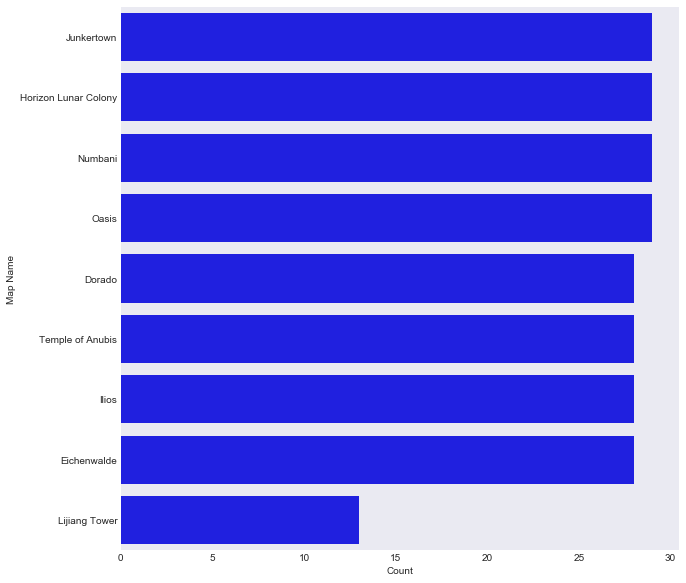

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="Count", y="Map Name", data=map_count,
            label="Total", color="b")

In [16]:
full_df.to_csv("Match Summary Data.csv")